In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform

In [3]:
train_dataset = h5py.File("train_catvnoncat.h5", 'r')
test_dataset = h5py.File("test_catvnoncat.h5", 'r')

In [4]:
for k in train_dataset.keys():
    print(k)

list_classes
train_set_x
train_set_y


In [5]:
train_dataset['train_set_x'].shape

(209, 64, 64, 3)

In [6]:
train_dataset['train_set_y'].shape

(209,)

In [7]:
# 取出训练集与测试集
train_data_org = train_dataset["train_set_x"][:]
train_labels_org = train_dataset['train_set_y'][:]
test_data_org = test_dataset["test_set_x"][:]
test_labels_org = test_dataset['test_set_y'][:]

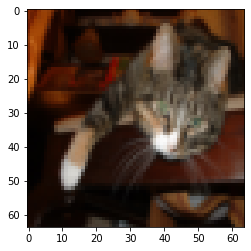

In [8]:
# 查看图片
%matplotlib inline
plt.imshow(train_data_org[148])

In [9]:
# 数据维度处理
# 获取样本个数
m_train = train_data_org.shape[0]
m_test = test_data_org.shape[0]

train_data_tran = train_data_org.reshape(m_train, -1).T #将（209，64，64，3）reshape成（209，64*64*3）的格式，再转置
test_data_tran = test_data_org.reshape(m_test, -1).T

In [10]:
print(train_data_tran.shape, test_data_tran.shape)

(12288, 209) (12288, 50)


In [11]:
# 数据维度处理
# 标签的处理
train_lable_tran = train_labels_org.reshape(1, m_train)
test_lable_tran = test_labels_org.reshape(1, m_test)
print(train_lable_tran.shape, test_lable_tran.shape)

(1, 209) (1, 50)


In [12]:
# 标准化数据
# 将0~255标准化到0~1
train_data_sta = train_data_tran / 255
test_data_sta = test_data_tran / 255
print(test_data_sta)

[[0.61960784 0.45098039 1.         ... 0.16078431 0.07058824 0.52156863]
 [0.40784314 0.43137255 0.99215686 ... 0.18431373 0.07058824 0.63921569]
 [0.3254902  0.43529412 0.99607843 ... 0.32941176 0.0627451  0.29411765]
 ...
 [0.67843137 0.67058824 0.52156863 ... 0.71764706 0.56470588 0.01960784]
 [0.50196078 0.69019608 0.39607843 ... 0.55294118 0.5372549  0.08627451]
 [0.43137255 0.72941176 0.4745098  ... 0.45490196 0.42352941 0.01960784]]


In [13]:
# 定义sigmoid函数
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [14]:
# 初始化w, b
n_dim = train_data_sta.shape[0]
w = np.zeros((n_dim, 1))
b = 0

In [15]:
# 定义前向传播函数，代价函数，梯度下降
def propagate(w, b, X, y):
    
    # 前向传播函数
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    # 代价函数
    m = X.shape[1]
    J = -1/m * np.sum(y * np.log(A) + (1-y) * np.log(1-A))
    
    # 梯度下降
    dw = 1/m * np.dot(X, (A-y).T)
    db = 1/m * np.sum(A-y) 
    
    grands = {"dw":dw, "db":db}
    
    return grands,J

In [16]:
# 优化部分
def optimize(w, b, X, y, alpha, n_iters):
    
    J_lis = []
    
    for i in range(n_iters):
        grands, J = propagate(w, b, X, y)
        
        dw = grands["dw"]
        db = grands["db"]
        
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % 100 == 0:
            J_lis.append(J)
            print("n_iters is ", i, ", cost is ", J)
            
    grands = {"dw":dw, "db":db}
    params = {"w":w, "b":b}
            
    return grands,params,J_lis

In [17]:
# 预测部分
def predict(w, b, X_test):
    
    Z = np.dot(w.T, X_test) + b
    A = sigmoid(Z)
    
    m = X_test.shape[1]
    y_pred = np.zeros((1,m))
    
    for i in range(m):
        if A[:,i] > 0.5:
            y_pred[:, i] = 1
        else:
            y_pred[:, i] = 0
    return y_pred

In [18]:
# 模型的整合
def model(w, b, X_train, y_train, X_test, y_test, alpha, n_iters):
    grands,params,J_lis = optimize(w, b, X_train, y_train, alpha, n_iters)
    w = params["w"]
    b = params["b"]
    
    y_pred_train = predict(w, b, X_train)
    y_pred_test = predict(w, b, X_test)
    
    print("the train acc is ", np.mean(y_pred_train == y_train)*100,"%")
    print("the test acc is ", np.mean(y_pred_test == y_test)*100,"%")
    
    d = {
        'w':w,
        'b':b,
        "y_pred_train":y_pred_train,
        'y_pred_test':y_pred_test,
        'alpha':alpha
    }
    
    return d, J_lis

In [19]:
d, J_lis = model(w, b, train_data_sta, train_lable_tran, test_data_sta, test_lable_tran, alpha=0.005, n_iters=2000)

n_iters is  0 , cost is  0.6931471805599453
n_iters is  100 , cost is  0.5845083636993085
n_iters is  200 , cost is  0.4669490409465547
n_iters is  300 , cost is  0.37600686694802077
n_iters is  400 , cost is  0.3314632893282512
n_iters is  500 , cost is  0.303273067474383
n_iters is  600 , cost is  0.27987958658260487
n_iters is  700 , cost is  0.2600421369258757
n_iters is  800 , cost is  0.2429406846779662
n_iters is  900 , cost is  0.22800422256726066
n_iters is  1000 , cost is  0.2148195137844964
n_iters is  1100 , cost is  0.20307819060644985
n_iters is  1200 , cost is  0.1925442771670686
n_iters is  1300 , cost is  0.18303333796883509
n_iters is  1400 , cost is  0.17439859438448876
n_iters is  1500 , cost is  0.16652139705400335
n_iters is  1600 , cost is  0.15930451829756614
n_iters is  1700 , cost is  0.152667324712965
n_iters is  1800 , cost is  0.1465422350398234
n_iters is  1900 , cost is  0.14087207570310162
the train acc is  99.04306220095694 %
the test acc is  70.0 %


Text(0, 0.5, 'J')

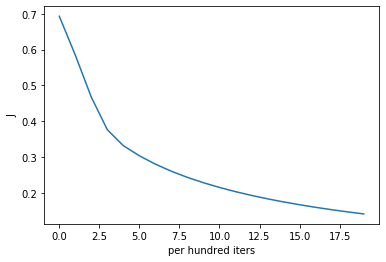

In [20]:
plt.plot(J_lis)
plt.xlabel('per hundred iters')
plt.ylabel("J")

In [21]:
index = 48
print('y is ', test_lable_tran[0, index])
print('y_presiction is ', int(d['y_pred_test'][0,index]))

y is  1
y_presiction is  1


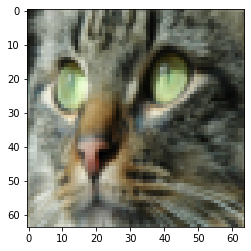

In [22]:
plt.imshow(test_data_org[index])

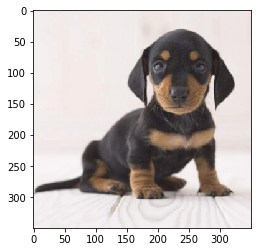

In [32]:
# 测试
#my_path = '/Users/yuanshuozhang/Desktop/猫.jpeg'
my_path = '/Users/yuanshuozhang/Desktop/狗.jpg'
my_image = plt.imread(my_path)
plt.imshow(my_image)

In [33]:
# 改测试集尺寸
my_image.shape

(350, 350, 3)

(12288, 1)

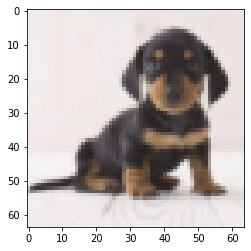

In [34]:
my_image_tran = transform.resize(my_image, (64,64,3))
plt.imshow(my_image_tran)
my_image_tran = my_image_tran.reshape(64*64*3,1)
my_image_tran.shape

In [35]:
y_predict = predict(d["w"], d["b"], my_image_tran)
print(int(y_predict))

0
